### Prediciting heart disease

This notebook is about predicting whether a patient has heart disease using libraries like NumPy, Pandas, Matplotlib, scikit-learn, and more.

For this project, the evaluation metric is for the model to achieve an accuracy of over 90% in its predictions.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc


In [175]:
df = pd.read_csv("heart-disease-csv.csv")

In [26]:
df.shape

(303, 14)

In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


About the data

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [31]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [33]:
#counting how many people have heart_disease and haven't 
df.target.value_counts(normalize=True)

target
1    0.544554
0    0.455446
Name: proportion, dtype: float64

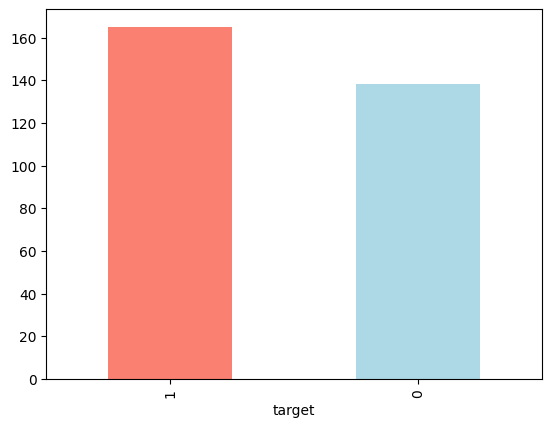

In [35]:
#We can also plot graph to compare the value side by side
df.target.value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [37]:
#Checing for NULL values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [39]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


For this project, we are predicting heart disease. Many factors are related to heart disease, so we have to check the correlation between the column values.

In [48]:
corr_relation = df.corr()
corr_relation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


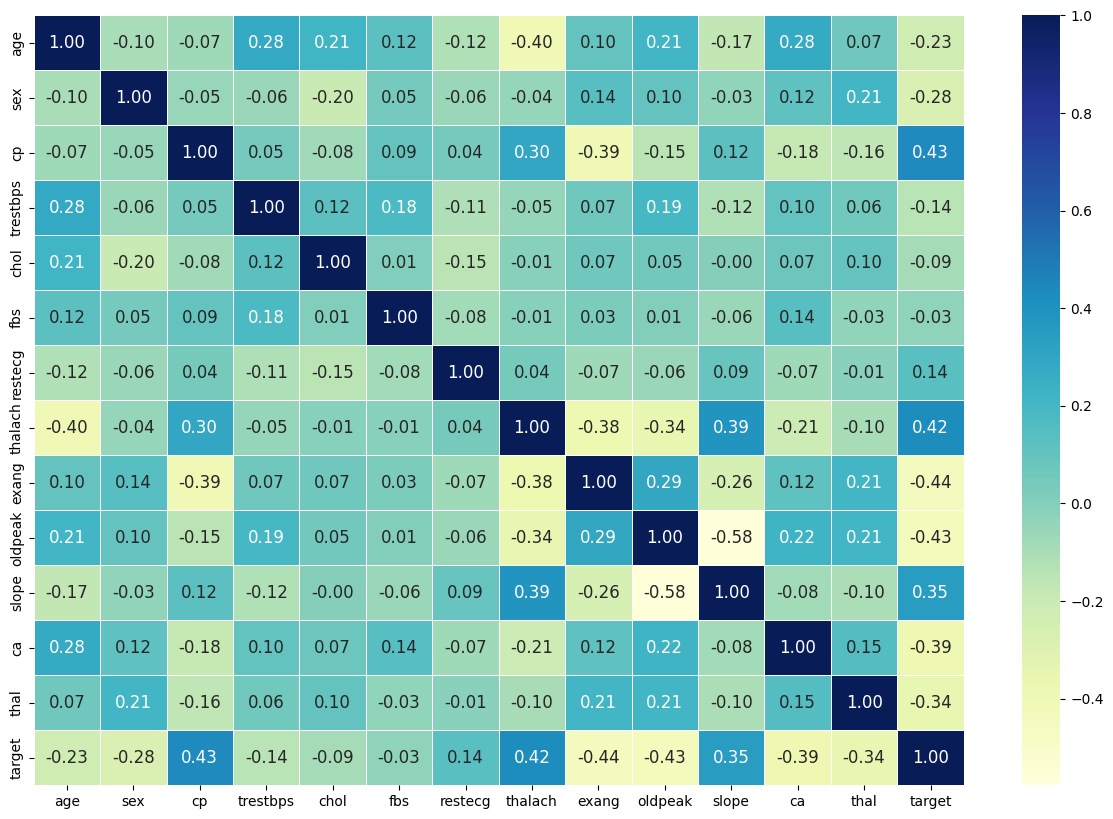

In [50]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_relation, 
            annot=True, 
            annot_kws={"size": 12},
            linewidths=0.5, 
            fmt=".2f", 
            cmap="YlGnBu")
plt.show()

From the above heatmap we can say that `ca` , `thal`, `oldpeak`,`exang`, `sex` has a negative co-relation with the target. 
For the positive co-relation we can see that `cp`,`thalach`,`slope` with the target.

Let's move on to modeling. We've completed the data processing and analysis of the dataset.

In [52]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Dropping the target column as we are using the other variables or columns to make predictions.

In [55]:
x = df.drop("target", axis=1)
y = df.target.values

In [57]:
x #x is independent variable

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [59]:
y #y is depeneted variable

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Spliting the dataset for the training the model

In [62]:
from sklearn.model_selection import train_test_split

In [64]:
np.random.seed(42)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

Let's have a look on the training samples

In [67]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [69]:
y_train

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1])

In [71]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2
258,62,0,0,150,244,0,1,154,1,1.4,1,0,2
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1


In [73]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1])

In [75]:
print(f"{len(x)},{len(y)},{len(x_train)},{len(y_train)},{len(x_test)},{len(y_test)}")

303,303,227,227,76,76


Next Step: Model Selection

Since we need to predict whether a patient has heart disease or not, we'll be using a classification model.
For that we can use the:
1. `Logistic Regression` : Because it's designed specially for the problem of classification or Binary classification. And in our dataset we are going to train the model to predict the preson have(1) the heart disease or not(1).
2. `K-Nearest Neighbours`: KNN is a simple, non-parametric model that classifies based on the closest data points in the feature space. It's useful when you want a model that can adapt to complex decision boundaries.
3. `Random Forest Classifier` : Random forestis an ensemble of decision trees, making it robust against overfitting and capable of capturing complex interactions between features. It often performs well on structured data like yours.


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [79]:
models = {"KNN" : KNeighborsClassifier(),
         "Logistic Regression": LogisticRegression(),
         "Random Forest": RandomForestClassifier()}

def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)

    model_score = {}

    for name,model in models.items():
        model.fit(x_train,y_train)
        model_score[name] = model.score(x_test,y_test)
    return model_score

In [82]:
model_score = fit_and_score(models=models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
model_score

{'KNN': 0.6973684210526315,
 'Logistic Regression': 0.868421052631579,
 'Random Forest': 0.8157894736842105}

### Model Selection 
Let's compare the model scores.

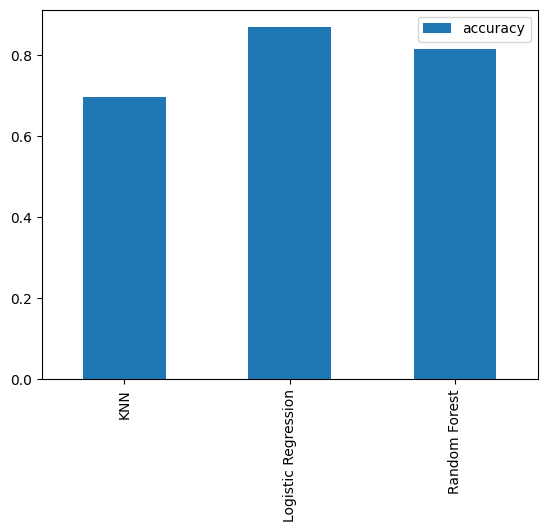

In [92]:
model_compare = pd.DataFrame(model_score,index=['accuracy'])
model_compare.T.plot.bar();

Till now we've evaluated the model with the default hyperparameters without using the cross-validation etc. Let's move forward towards it.

### Hyperparameters tunning and cross-validation

#### KNeighborsClassifier

For the KNeighborsClassifier the only hyperparameter we can change or modify is the number of neighbours.

In [104]:
train_scores = []
test_scores = [] 
neighbors = range(1, 21)
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train, y_train)
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))

In [106]:
train_scores

[1.0,
 0.7929515418502202,
 0.7709251101321586,
 0.7444933920704846,
 0.7577092511013216,
 0.73568281938326,
 0.7268722466960352,
 0.7136563876651982,
 0.7224669603524229,
 0.7136563876651982,
 0.7312775330396476,
 0.7136563876651982,
 0.7092511013215859,
 0.6960352422907489,
 0.6960352422907489,
 0.6784140969162996,
 0.6960352422907489,
 0.6607929515418502,
 0.6916299559471366,
 0.6784140969162996]

Maximum KNN score on the test data: 75.00%


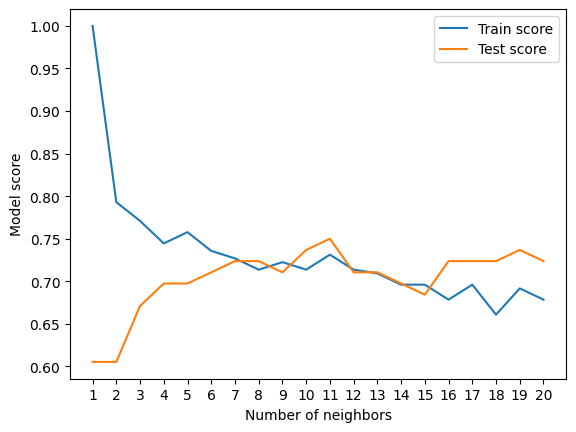

In [108]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

From the above graph we can see that the best hyperparameter for the this model is 12.

For the other two models there are alot so instead doing it manually we'll do it by using the RandomizedSearchCV.

In [112]:
log_reg_grid = {
    "C": np.logspace(-4,4,20),
    "solver": ["liblinear"]
}

rf_grid = {
    "n_estimators": np.arange(10,1000,50),
    "max_depth": [None,3,5,10],
    "min_samples_split": np.arange(2,20,2),
    "min_samples_leaf": np.arange(1,20,2)
}


In [154]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(x_train, y_train);

y_preds = rs_log_reg.predict(x_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [118]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [120]:
rs_log_reg.score(x_test,y_test)

0.8947368421052632

We've tuned the `Logisticregression()` we'll do the same for the `RandomForestClassifier()`

In [127]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [131]:
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 4,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [133]:
rs_rf.score(x_test,y_test)

0.8421052631578947

We've done the fine-tuning part. Now it's time to evaluate the models beyond the accuracy.

---

Evaluation Metrics

1. ROC Curve and AUC Score: Used for comparing the true positive to false positive rate.

2. Confusion Matrix

3. Classification Report

    1. Precision
    
    2. Recall
    
    3. F1-Score

---

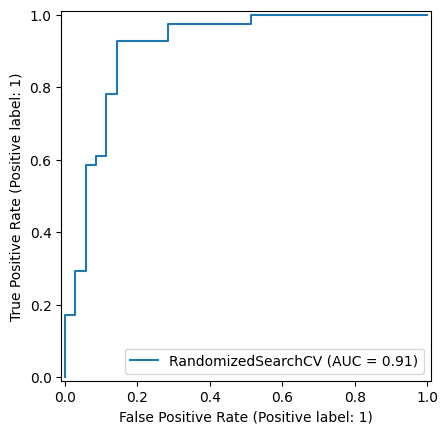

In [148]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(estimator=rs_log_reg,
                               X=x_test,
                               y=y_test);

So the AUC = 0.91 > 5. Which means that has high ability to discriminate the between the given classification.

#### Confusion Matrix

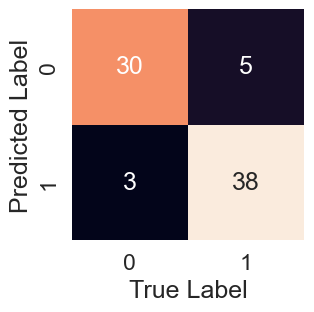

In [158]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3)) 
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label") 

plot_conf_mat(y_test, y_preds)


The confusion matrix shows that the model correctly predicted 30 instances as negative (True Negatives) and 38 instances as positive (True Positives). However, there were 5 False Positives, where the model predicted positive, but the actual label was negative, and 3 False Negatives, where the model predicted negative, but the actual label was positive. This indicates that the model is generally accurate but still has a few misclassifications, especially in the positive predictions.

#### Classification report

In [163]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88        35
           1       0.88      0.93      0.90        41

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.89        76
weighted avg       0.90      0.89      0.89        76



From the classification report, we can make the following observations about the model:

1. **Precision and Recall for Class 0 and Class 1:**
   - **Class 0:**
     - Precision: 0.91 — This means that when the model predicts class 0, it is correct 91% of the time.
     - Recall: 0.86 — Out of all actual instances of class 0, the model correctly identifies 86% of them.
   - **Class 1:**
     - Precision: 0.88 — When the model predicts class 1, it is correct 88% of the time.
     - Recall: 0.93 — Out of all actual instances of class 1, the model correctly identifies 93% of them.

2. **F1-Score:**
   - The F1-score, which balances precision and recall, is 0.88 for class 0 and 0.90 for class 1, indicating that the model performs slightly better on class 1.

3. **Overall Model Performance:**
   - **Accuracy:** 0.89 — The model correctly classifies 89% of the total instances.
   - **Macro Average:**
     - Precision, recall, and F1-score all average around 0.89, indicating balanced performance across both classes.
   - **Weighted Average:**
     - Precision, recall, and F1-score are also approximately 0.89 when considering the support (number of instances) of each class, showing that the model performs well overall.


END OF THE PROJECT